In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

In [2]:
DATA_PATH = "data/results/final_data.csv"
df = pd.read_csv(DATA_PATH)

# Drop name column
df.drop(columns=["name", "longitude", "latitude"], inplace=True)

df.head()

,ndvi,discharge,ndwi,precipitation,slope_degrees,ndbi,mndwi,label
0,0.066701,55.034,0.073592,3.131967,7.622371,NaN,NaN,1
1,0.731389,1.290,-0.653989,5.849727,10.982635,NaN,NaN,1
2,0.042219,0.316,0.080037,6.014481,14.731374,NaN,NaN,1
3,0.320390,116.366,-0.316262,1.683060,2.037220,NaN,NaN,1
4,0.399828,36.573,-0.378034,1.739071,2.888671,NaN,NaN,1


In [3]:
#Split into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (6380, 7), y_train shape: (6380,)
X_test shape: (1595, 7), y_test shape: (1595,)


In [4]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train = X_train_imputed
X_test = X_test_imputed

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    min_samples_leaf=2,
    criterion='entropy',
    class_weight='balanced',
    max_samples=0.8,
    max_features=0.5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RandomForest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

RandomForest Accuracy: 0.9974921630094044
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       1.00      0.99      1.00       614

    accuracy                           1.00      1595
   macro avg       1.00      1.00      1.00      1595
weighted avg       1.00      1.00      1.00      1595



Iteration 1, loss = 0.52677288
Validation score: 0.854232
Iteration 2, loss = 0.35516727
Validation score: 0.866771
Iteration 3, loss = 0.29464076
Validation score: 0.863636
Iteration 4, loss = 0.28080291
Validation score: 0.866771
Iteration 5, loss = 0.27348598
Validation score: 0.868339
Iteration 6, loss = 0.27058066
Validation score: 0.885580
Iteration 7, loss = 0.26965688
Validation score: 0.882445
Iteration 8, loss = 0.26514791
Validation score: 0.877743
Iteration 9, loss = 0.26188173
Validation score: 0.874608
Iteration 10, loss = 0.26063685
Validation score: 0.876176
Iteration 11, loss = 0.25489185
Validation score: 0.877743
Iteration 12, loss = 0.25171087
Validation score: 0.887147
Iteration 13, loss = 0.24845443
Validation score: 0.887147
Iteration 14, loss = 0.24361643
Validation score: 0.888715
Iteration 15, loss = 0.23914242
Validation score: 0.893417
Iteration 16, loss = 0.23442765
Validation score: 0.894984
Iteration 17, loss = 0.22508535
Validation score: 0.909091
Iterat

/home/stefan/Documents/Study Materials/Computer Science/Programming/Satelit Data Processing/Prj/Hydropower-plant-detection/.lib/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


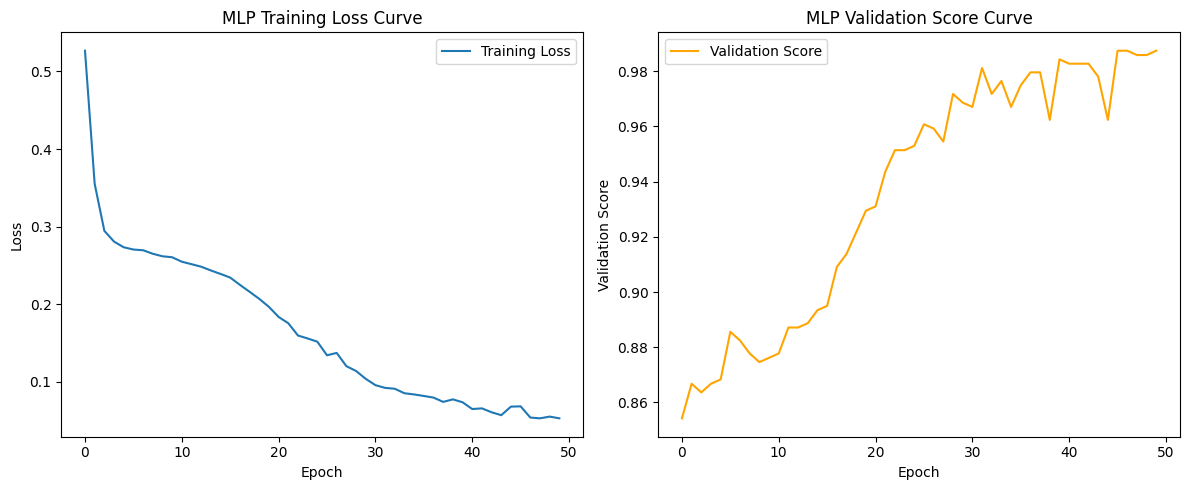

MLP Accuracy: 0.9761755485893417
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       981
           1       0.98      0.96      0.97       614

    accuracy                           0.98      1595
   macro avg       0.98      0.97      0.97      1595
weighted avg       0.98      0.98      0.98      1595



In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=50,
    batch_size=128,
    early_stopping=True,
    alpha=0.001,
    random_state=42,
    verbose=True
)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
# Plot validation score and loss curve for the MLPClassifier

plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP Training Loss Curve')
plt.legend()

# Validation score curve (if early_stopping=True)
if hasattr(mlp, 'validation_scores_'):
    plt.subplot(1, 2, 2)
    plt.plot(mlp.validation_scores_, label='Validation Score', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Score')
    plt.title('MLP Validation Score Curve')
    plt.legend()

plt.tight_layout()
plt.show()

print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))